## Library

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [27]:
df = pd.read_csv('vehicle_maintenance_data.csv')
df.sample()

,Vehicle_Model,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
18936,SUV,55992,Good,2,9,Electric,Manual,1500,71476,2024-01-21,2024-08-31,First,12866,1,3,17.070173,Worn Out,Good,New,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Vehicle_Model         50000 non-null  object 
 1   Mileage               50000 non-null  int64  
 2   Maintenance_History   50000 non-null  object 
 3   Reported_Issues       50000 non-null  int64  
 4   Vehicle_Age           50000 non-null  int64  
 5   Fuel_Type             50000 non-null  object 
 6   Transmission_Type     50000 non-null  object 
 7   Engine_Size           50000 non-null  int64  
 8   Odometer_Reading      50000 non-null  int64  
 9   Last_Service_Date     50000 non-null  object 
 10  Warranty_Expiry_Date  50000 non-null  object 
 11  Owner_Type            50000 non-null  object 
 12  Insurance_Premium     50000 non-null  int64  
 13  Service_History       50000 non-null  int64  
 14  Accident_History      50000 non-null  int64  
 15  Fuel_Efficiency    

In [29]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype=="float64":
        numerical.append(col)
    else:
        catgcols.append(col)
for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5376\1181777578.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5376\1181777578.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [30]:
numerical

['Fuel_Efficiency']

In [31]:
catgcols

['Vehicle_Model',
 'Mileage',
 'Maintenance_History',
 'Reported_Issues',
 'Vehicle_Age',
 'Fuel_Type',
 'Transmission_Type',
 'Engine_Size',
 'Odometer_Reading',
 'Last_Service_Date',
 'Warranty_Expiry_Date',
 'Owner_Type',
 'Insurance_Premium',
 'Service_History',
 'Accident_History',
 'Tire_Condition',
 'Brake_Condition',
 'Battery_Status',
 'Need_Maintenance']

In [32]:
df['Need_Maintenance'].value_counts()

Need_Maintenance
1    40498
0     9502
Name: count, dtype: int64

In [33]:
ind_col = [col for col in df.columns if col !='Need_Maintenance']
dep_col = 'Need_Maintenance'

In [34]:
df[dep_col].value_counts()

Need_Maintenance
1    40498
0     9502
Name: count, dtype: int64

## Transformasi Dataset

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in catgcols:
    df[col] = le.fit_transform(df[col])

In [36]:
df['Need_Maintenance'] = le.fit_transform(df['Need_Maintenance'])

In [37]:
x = df[ind_col] #feature
y = df[dep_col] #label

In [38]:
df.head()

,Vehicle_Model,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
0,4,18183,1,0,3,1,0,3,7881,238,422,1,13664,5,3,13.622204,1,1,2,1
1,5,19155,0,1,6,1,0,4,37802,175,402,1,15994,6,0,13.625307,1,1,2,1
2,0,24005,2,0,1,1,0,2,9451,89,364,0,11206,6,0,14.306302,1,0,2,1
3,0,19475,0,4,4,2,0,4,22925,147,556,1,1055,6,3,18.709467,1,2,1,1
4,0,9937,2,5,0,2,1,3,27315,56,504,2,9893,5,2,16.977482,0,0,2,1


## End Dataset Clean

## Import csv

In [39]:
df.to_csv('vehicle_maintenance_datatransform.csv',index=False)

In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

## Model Decision Tree

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=5, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
    )

model = dtc.fit(x_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"akurasi data training ={accuracy_score(y_train, dtc.predict(x_train))}")
print(f"akurasi data testing ={dtc_acc} \n")

print(f"confusion matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))} \n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))
tn, fp, fn, tp = confusion.ravel()
print(f"maintenance report : \n {classification_report(y_test, dtc.predict(x_test))}")

akurasi data training =0.942675
akurasi data testing =0.9408 

confusion matrix : 
[[1900    0]
 [ 592 7508]] 

maintenance report : 
               precision    recall  f1-score   support

           0       0.76      1.00      0.87      1900
           1       1.00      0.93      0.96      8100

    accuracy                           0.94     10000
   macro avg       0.88      0.96      0.91     10000
weighted avg       0.95      0.94      0.94     10000



## Simulasi Model

In [42]:
input_data = (4,1012,0,2,0,0,0,0,19938,135,130,2,10210,4,3,15.95442206,2,0,1)
input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0]==0):
    print('Kendaraan disarankan melakukan services kendaraan')
else:
    print('Kendaraan tidak disarankan melakukan services kendaraan')

[0]
Kendaraan disarankan melakukan services kendaraan


c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Visualisai Decision Tree

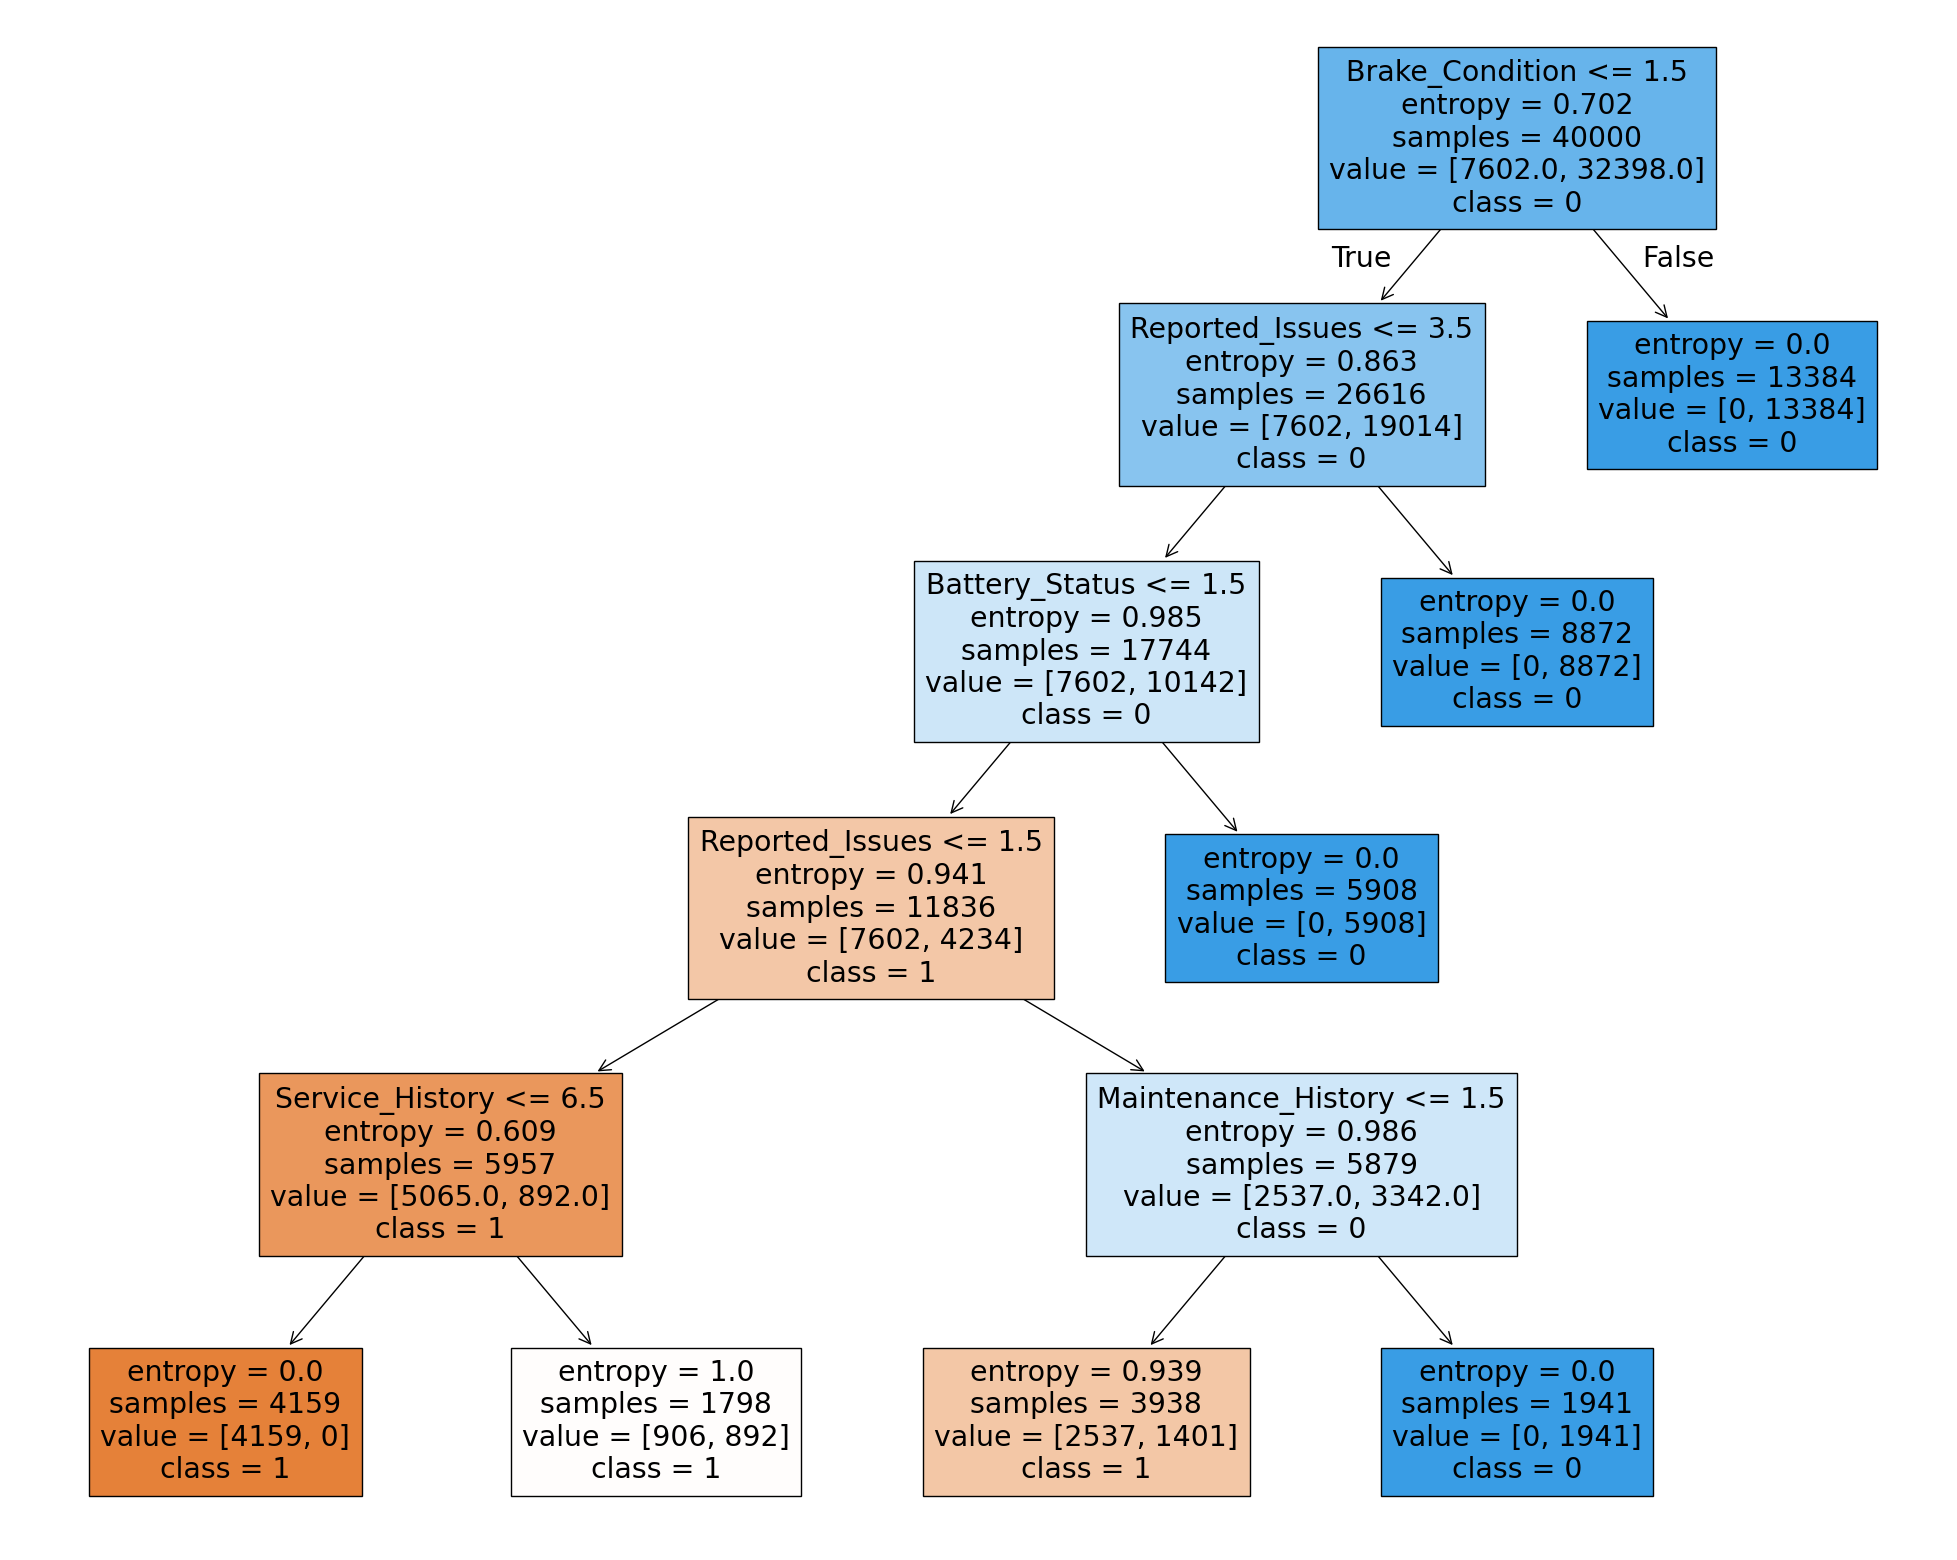

In [43]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=ind_col,
                   class_names=['1','0'],
                   filled=True)

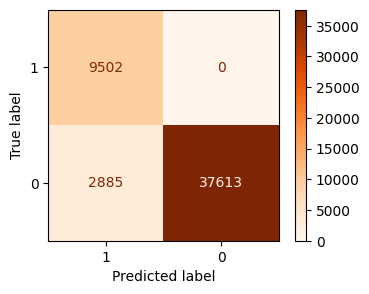

In [47]:
from sklearn.metrics import  ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(4, 3))
disp = ConfusionMatrixDisplay.from_estimator (model, x, y, display_labels=['1', '0'], ax=ax, cmap=plt.cm.Oranges)